In [1]:
import numpy as np 

dat = open('data1d.out','r').readlines()
    
ndstep = int(dat[0])     # of time steps
mpsi = int(dat[1])       # of particle species
nspecies = int(dat[2])   # of diagnostics per particle
nhybrid = int(dat[3])    # of pertubed fields
mpdata1d = int(dat[4])      # of modes per perturbed field
nfield = int(dat[5])     # of diagnostics per field
mfdata1d = int(dat[6])    # of time step size

#print important parameters for reference
print("tsteps,","mpsi,", "nspecies,", "nhybrid,", "mpdata1d,", "nfield,", "mfdata1d")
print(ndstep, mpsi, nspecies, nhybrid, mpdata1d, nfield, mfdata1d)


del dat[0:7] # Remove first 7 values for cleaner array

#convert dat to float
for i in range(0,len(dat)-1):
    dat[i]=float(dat[i])

# initialize class array
rtdat=[]

# store data into list of lists, rtdat
len_per_step=2*mpsi*nfield+nspecies*mpsi*mpdata1d
for i in range(0,ndstep):
    rtdat.append(dat[len_per_step*i:len_per_step*(i+1)])
    
# initialize history data arrays  
data1di = np.zeros((ndstep,mpsi,mpdata1d))
data1de = np.zeros((ndstep,mpsi,mpdata1d))
data1df = np.zeros((ndstep,mpsi,mpdata1d))
field00 = np.zeros((ndstep,mpsi,nfield))
fieldrms = np.zeros((ndstep,mpsi,nfield))
              
for i in range(0,ndstep):
    for m in range(0,mpdata1d):
        data1di[i,:,m]=rtdat[i][mpsi*m:mpsi*(m+1)]
    if nspecies == 2:
        if nhybrid > 0:
            for m in range(0,mpdata1d):
                data1de[i,:,m]=rtdat[i][mpsi*mpdata1d + mpsi*m:mpsi*mpdata1d + mpsi*(m+1)]
        else:
            for m in range(0,mpdata1d):
                data1df[i,:,m]=rtdat[i][mpsi*mpdata1d + mpsi*m:mpsi*mpdata1d + mpsi*(m+1)]
    elif nspecies == 3:
        for m in range(0,mpdata1d):
            data1df[i,:,m]=rtdat[i][mpsi*mpdata1d + mpsi*m:mpsi*mpdata1d + mpsi*(m+1)]
            data1de[i,:,m]=rtdat[i][2*mpsi*mpdata1d + mpsi*m:2*mpsi*mpdata1d + mpsi*(m+1)]
    for n in range(0,nfield):
        field00[i,:,n]=rtdat[i][nspecies*mpdata1d*mpsi + mpsi*n : nspecies*mpdata1d*mpsi + mpsi*(n+1)]
        fieldrms[i,:,n]=rtdat[i][nspecies*mpdata1d*mpsi + nfield*mpsi + mpsi*n : nspecies*mpdata1d*mpsi + nfield*mpsi + mpsi*(n+1)]



tsteps, mpsi, nspecies, nhybrid, mpdata1d, nfield, mfdata1d
56 101 2 3 3 3 2


In [ ]:
data1de[:,:,0]

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


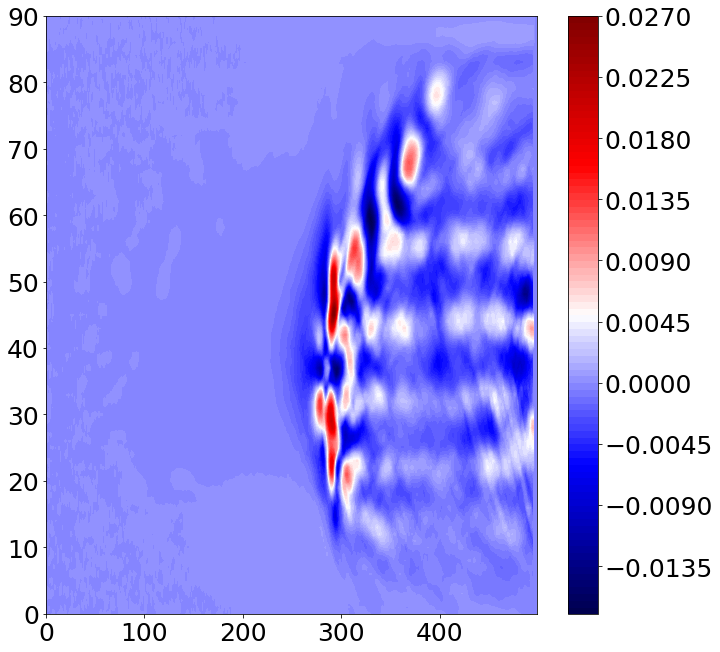

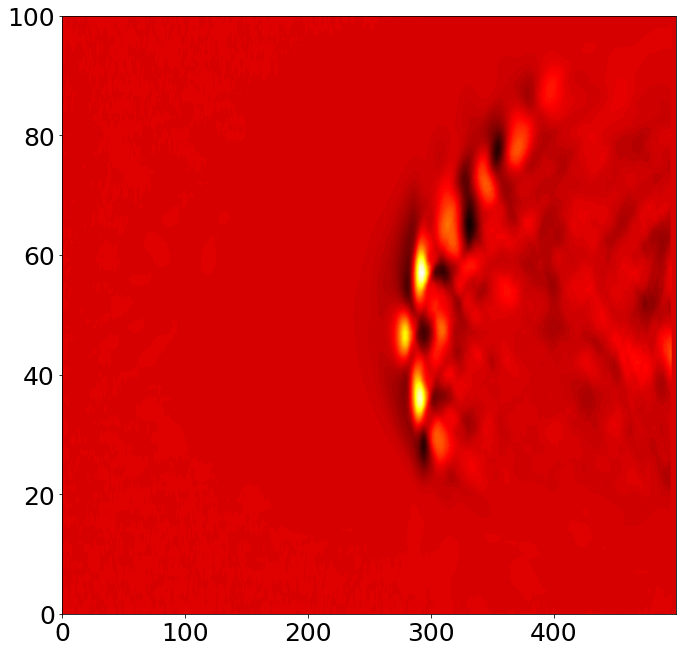

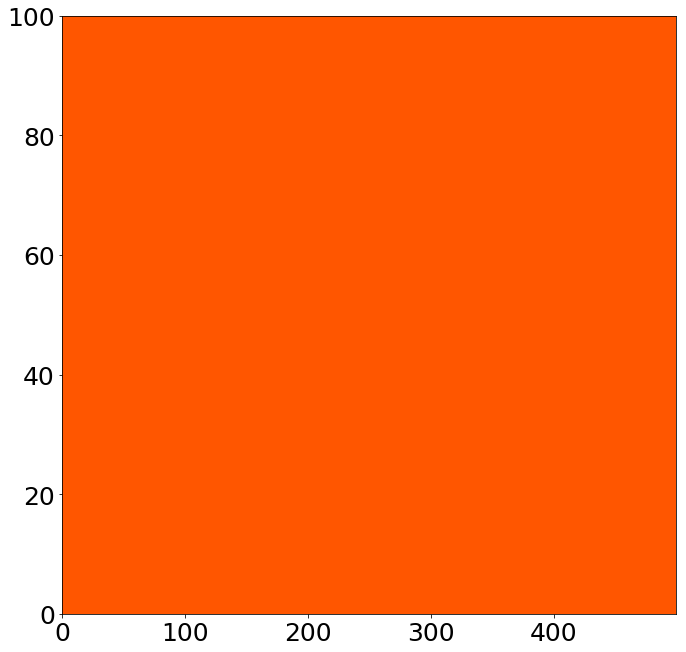

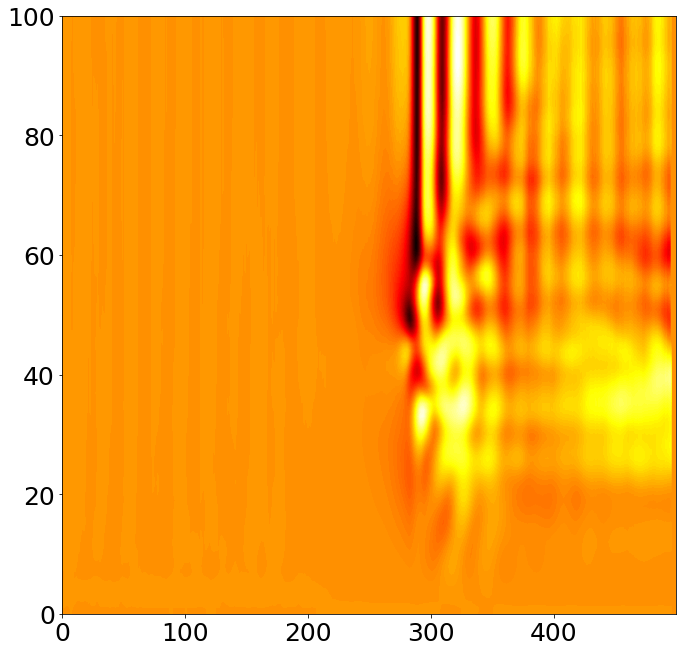

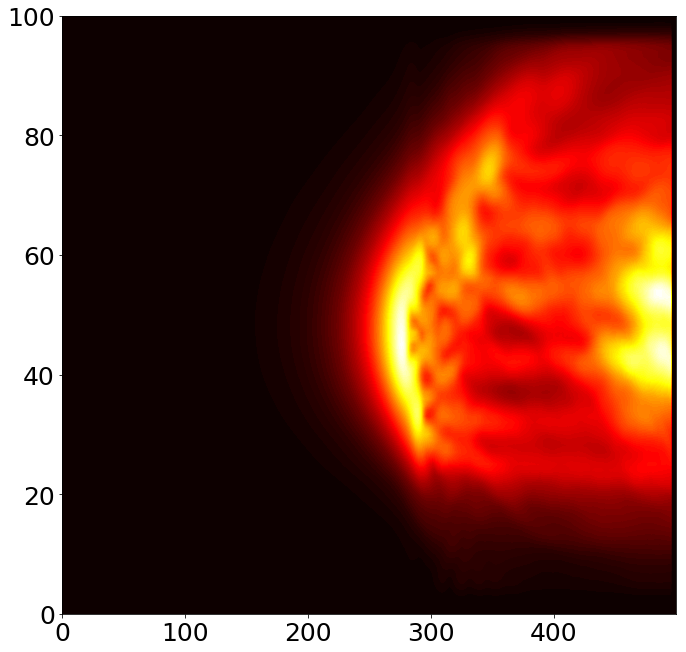

In [135]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(11,11))
plt.contourf(np.transpose(data1di[:,10:130,0]),100,cmap='seismic')
lim=data1di[:,:,0].max()
#plt.clim(-lim,lim)
plt.colorbar()
plt.show()

plt.figure(figsize=(11,11))
plt.contourf(np.transpose(data1de[:,:,0]),100,cmap='hot')
plt.show()

plt.figure(figsize=(11,11))
plt.contourf(np.transpose(data1df[:,:,0]),100,cmap='hot')
plt.show()

plt.figure(figsize=(11,11))
plt.contourf(np.transpose(field00[:,:,0]),100,cmap='hot')
plt.show()

plt.figure(figsize=(11,11))
plt.contourf(np.transpose(fieldrms[:,:,0]),100,cmap='hot')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(11,11))
plt.pcolormesh(np.transpose(field00[:,:,1]),cmap='seismic')
lim=field00[:,:,1].max()
plt.clim(-lim,lim)
plt.show()

plt.figure(figsize=(11,11))
plt.contourf(np.transpose(field00[:,:,1]),20,cmap='seismic')
lim=field00[:,:,1].max()
plt.clim(-lim,lim)
plt.show()

plt.figure(figsize=(11,11))
plt.contourf(np.transpose(fieldrms[:,:,1]),20,cmap='rainbow')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


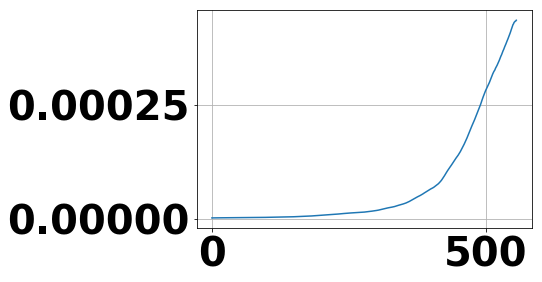

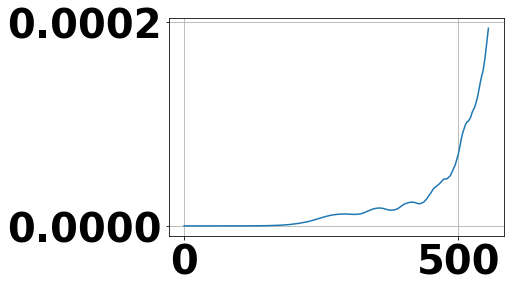

In [223]:
ptrms = np.zeros(ndstep)
zfrms = np.zeros(ndstep)

for i in range(0,ndstep):
    zfrms[i] = np.sqrt((sum(np.power(field00[i,:,1],2))))/mpsi
    ptrms[i] = sum(fieldrms[i,:,0])/mpsi
plt.plot(ptrms[:])
plt.grid()
plt.show()
plt.plot(zfrms[:])
plt.grid()
plt.show()

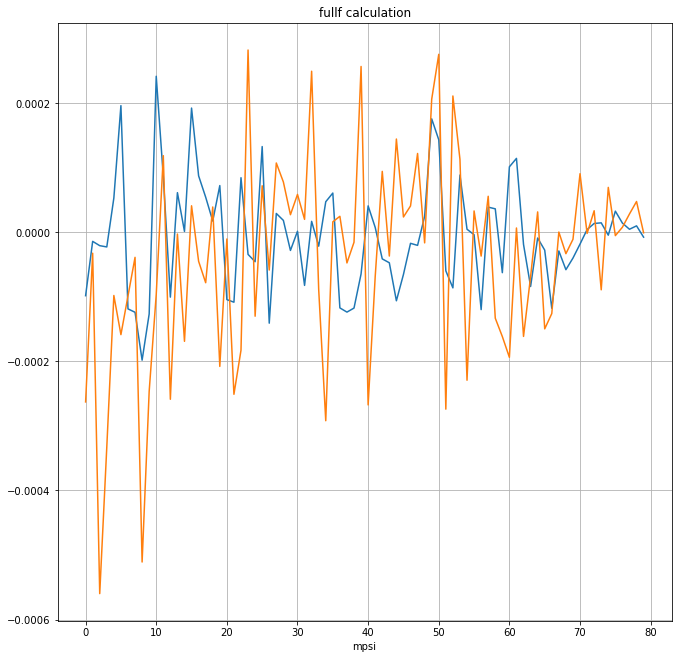

In [4]:
import matplotlib.pyplot as plt


t=-1
#x=np.linspace(0,100,101)
plt.figure(figsize=(11,11))
#h1,=plt.plot(x[10:90],k*data1di[t,10:90,1],label='$\chi_i$')
#h2,=plt.plot(x[10:90],k*data1de[t,10:90,1],label='$\chi_e$')
#plt.plot(abs(data1di[t,10:90,2]))
#plt.plot(abs(data1de[t,10:90,2]))
plt.plot(k*data1di[t,10:90,2])
plt.plot(k*data1de[t,10:90,2])
#plt.plot(fieldrms[t,:,0])
#plt.xlim(0,100)
#h3=plt.axvline(x=74,color='k',label='q=4')
#plt.legend(handles=[h1,h2,h3],fontsize=20)
plt.xlabel('mpsi')
plt.grid()
plt.title('fullf calculation')
plt.show()

In [ ]:
3

In [304]:
#1350
rho0=1.3786587E-03
utime=5.705E-09
ulength=1.74300
k=(ulength**2)*(rho0**2)/utime

In [3]:
#3050
rho0=1.4654782E-03
utime=5.6826126E-09
ulength=1.754700
k=(ulength**2)*(rho0**2)/utime

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


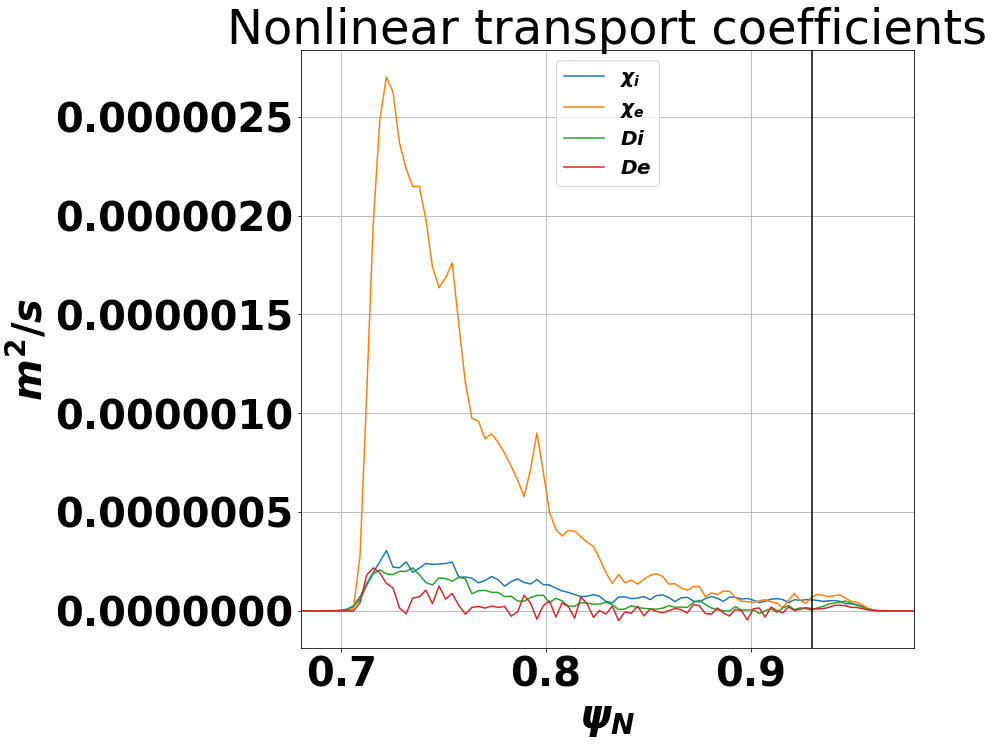

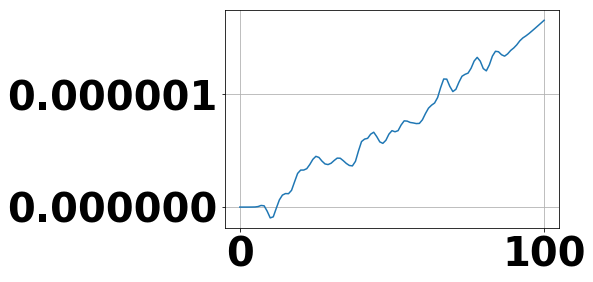

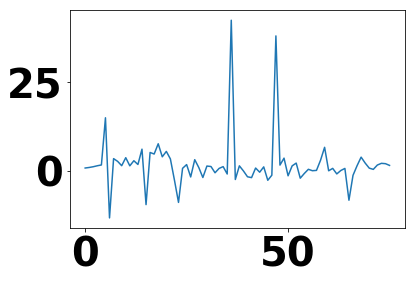

NameError: name 'er' is not defined

In [19]:




t=-1


plt.figure(figsize=(11,11))
h1,=plt.plot(psi,k*data1di[t,:,1],label='$\chi_i$')
h2,=plt.plot(psi,k*data1de[t,:,1],label='$\chi_e$')
#h3,=plt.plot(psi,k*(data1di[t,:,0]+data1de[t,:,0])/2,label='$D$')
h3,=plt.plot(psi,k*(data1di[t,:,0]),label='$Di$')
h4,=plt.plot(psi,k*(data1de[t,:,0]),label='$De$')
#h4,=plt.plot(psi,k*data1di[t,:,0],label='$Di$')


#plt.plot(abs(data1di[t,10:90,2]))
#plt.plot(abs(data1de[t,10:90,2]))
#plt.plot(field00[t,:,0])
#h3=plt.axvline(x=115,color='k',label='q=4')
plt
plt.legend(handles=[h1,h2,h3,h4],fontsize=20)
plt.xlabel('$\psi_N$')
plt.ylabel('$m^2/s$')
plt.xlim(0.68, 0.98)
plt.title('Nonlinear transport coefficients')
plt.grid()
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)
plt.axvline(x=0.930,color='k')
plt.show()

plt.figure
plt.plot(field00[t,:,0])
plt.grid()
plt.show()

plt.plot(data1di[t,10:86,0]/data1de[t,10:86,0])
plt.show()
plt.plot(er[t,:])
plt.show()

In [9]:
len(psi)

200

In [53]:
np.amax(abs(k*data1de[:,:,1]))
from numpy import unravel_index
unravel_index(abs(data1di[:,:,1]).argmax(), data1di[:,:,1].shape)

(463, 51)

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


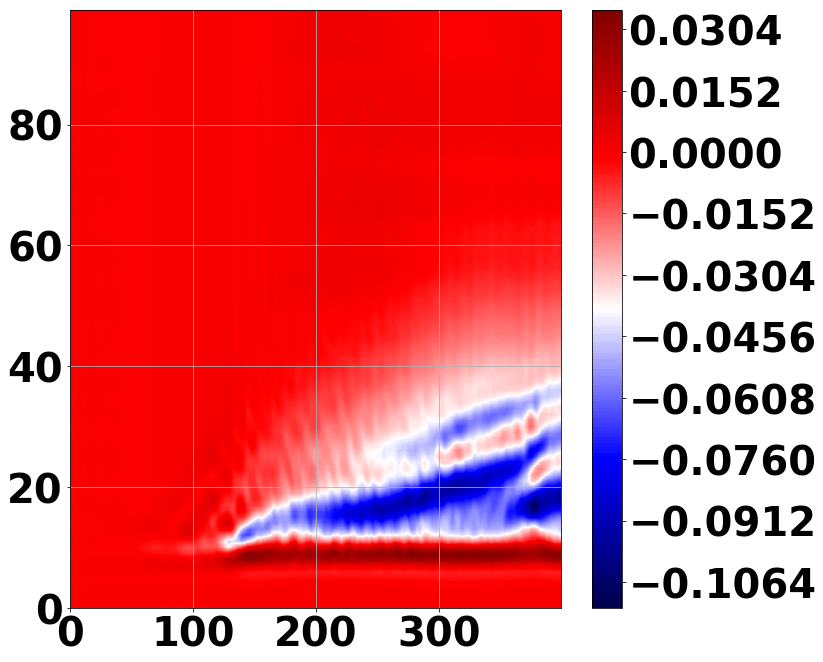

In [288]:
rho0=1.2303247E-03
utime=5.6826126E-09
ulength=1.754700
k=(ulength**2)*(rho0**2)/utime
dr=0.1154789-0.1071504

lp = len(field00[0,:,0])
r = np.zeros(lp)
for i in range(0,lp-1):
    r[i+1] = r[i] + (i+1)*dr
er = np.zeros((len(field00[:,0,0]),lp-1))
for t in range(0, len(field00[:,0,0])):
    er[t,:] = np.diff(field00[t,:,0]) / np.diff(r)

plt.figure(figsize=(11,11))
#plt.contourf(np.transpose(field00[:,:,0]),200,cmap='seismic')
plt.contourf(np.transpose(er[:,:]),200,cmap='seismic')

plt.grid()
plt.colorbar()
plt.show()



In [ ]:
len(r)

In [ ]:
import numpy as np

dat = open('kappa.out','r').readlines()
      
nplot = int(dat[0])                   # of 1D radial profile plots
mpsi   = int(dat[1])+1                   # of radials pts in profile plots
 

#print important parameters for reference
print("# of data arrays,","mpsi")
print(nplot,mpsi)

# Remove data format parameters
del dat[0:2]

#convert dat to float
for i in range(0,len(dat)-1):
    dat[i]=float(dat[i])
    
# initialize eq data arrays
kappa = np.zeros((mpsi,nplot)) # nplot = 0 --> dens, 1 --> Te, 2 --> Ti

# fill data arrays
for n in range(0,nplot):
    for i in range(0,mpsi):
        kappa[i,n] = dat[i + mpsi*n]
    

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


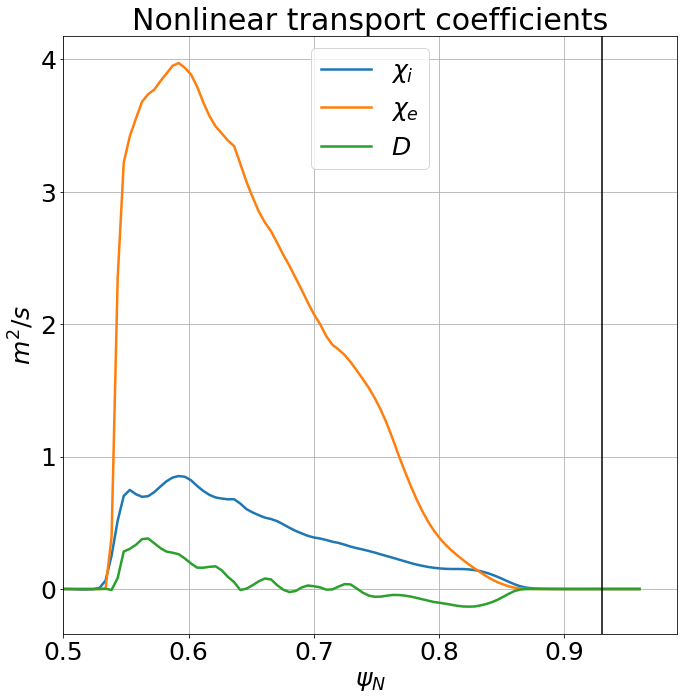

In [307]:
import matplotlib.pyplot as plt

Di=[]
De=[]
qi=[]
qe=[]
m0=0
m1=100
t0=200
t1=231
for m in range(m0,m1+1):
    #Di.append(sum(abs(data1di[t0:t1,m,0])))
    De.append(sum(data1de[t0:t1,m,0])/(t1-t0))
    qi.append(sum(data1di[t0:t1,m,1])/(t1-t0))
    qe.append(sum(data1de[t0:t1,m,1])/(t1-t0))
ft=25
plt.figure(figsize=(11,11))
h1,=plt.plot(psi,k*np.asarray(qi),label='$\chi_i$',linewidth=2.5)
h2,=plt.plot(psi,k*np.asarray(qe),label='$\chi_e$',linewidth=2.5)
h3,=plt.plot(psi,k*np.asarray(De),label='$D$',linewidth=2.5)
plt.grid()
plt.xlabel('$\psi_N$',fontsize=ft)
plt.ylabel('$m^2/s$',fontsize=ft)
plt.legend(handles=[h1,h2,h3],fontsize=ft)
plt.title('Nonlinear transport coefficients')
#plt.rc('axes', linewidth=3)
#plt.rc('grid', linewidth=1.5)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}

plt.rc('font', **font)
plt.axvline(x=0.930,color='k')
plt.xlim(0.5,0.99)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

Di=[]
De=[]
for t in range(0,ndstep):
    #Di.append(sum(abs(data1di[t,:,0])))
    #De.append(sum(abs(data1de[t,:,0])))
    Di.append(sum(data1di[t,:,0]))
    De.append(sum(data1de[t,:,0]))
ft=25
plt.figure(figsize=(8,8))
h1,=plt.plot(Di,label='$|D_i|$',linewidth=2.5)
h2,=plt.plot(De,label='$|D_e|$',linewidth=2.5)
plt.grid()
plt.xlabel('time',fontsize=ft)
plt.ylabel('gtc units',fontsize=ft)
plt.legend(handles=[h1,h2],fontsize=ft)
plt.title('Volume averaged diffusivity')
#plt.rc('axes', linewidth=3)
#plt.rc('grid', linewidth=1.5)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}

plt.rc('font', **font)
#plt.xlim(200,240)
plt.show()

dedi = np.zeros(ndstep)
for t in range(0, ndstep):
    dedi[t] = sum(data1de[t,:,0]) / sum(data1di[t,:,0])
m=35
plt.figure(figsize=(8,8))
h1,=plt.plot(dedi,label='$D_e / D_i$',linewidth=2.5)
h2,=plt.plot(er[:,m]/max(abs(er[:,m])),label='$d\phi_{00}/d\psi$',linewidth=2.5)
h3,=plt.plot(field00[:,m,0]/max(abs(field00[:,m,0])),label='$\phi_{00}$',linewidth=2.5)

plt.grid()
plt.xlabel('time',fontsize=ft)
plt.ylabel('gtc units',fontsize=ft)
plt.legend(handles=[h1,h2,h3],fontsize=ft)
plt.title('Volume averaged diffusivity')
#plt.rc('axes', linewidth=3)
#plt.rc('grid', linewidth=1.5)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}

plt.rc('font', **font)
#plt.xlim(2,299)
plt.ylim(-1,1)
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(np.array(Di)/np.array(De),linewidth=2.5)
plt.grid()
plt.xlabel('time',fontsize=ft)
plt.ylabel('|$D_i/D_e$|',fontsize=ft)
plt.title('Volume averaged')
plt.xlim(0,ndstep)
plt.show()

In [ ]:
rho0=1.1070614E-03
utime=5.6826126E-09
ulength=1.754700

k=(ulength**2)*(rho0**2)/utime
t=5930

plt.plot(k*data1di[t,:,1])
plt.plot(k*data1de[t,:,1])
#plt.axvline(x=74,color='k')
#plt.xlim(10,90)
plt.show()

In [ ]:
2**2

In [ ]:
k

In [ ]:
max(data1de[-1,:,1])

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


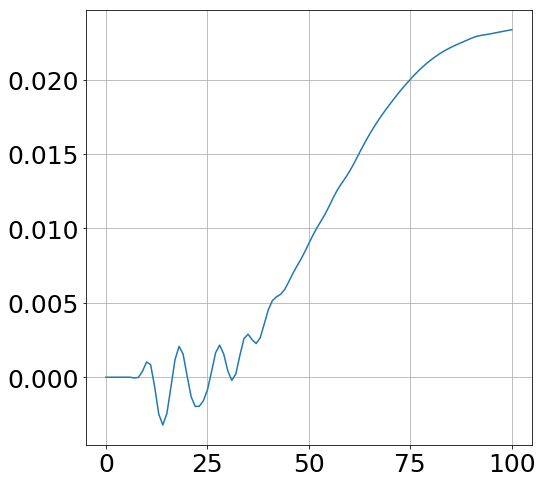

In [13]:
import matplotlib.pyplot as plt

t=-1

plt.figure(figsize=(8,8))

plt.plot(field00[t,:,0])
plt.grid()
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


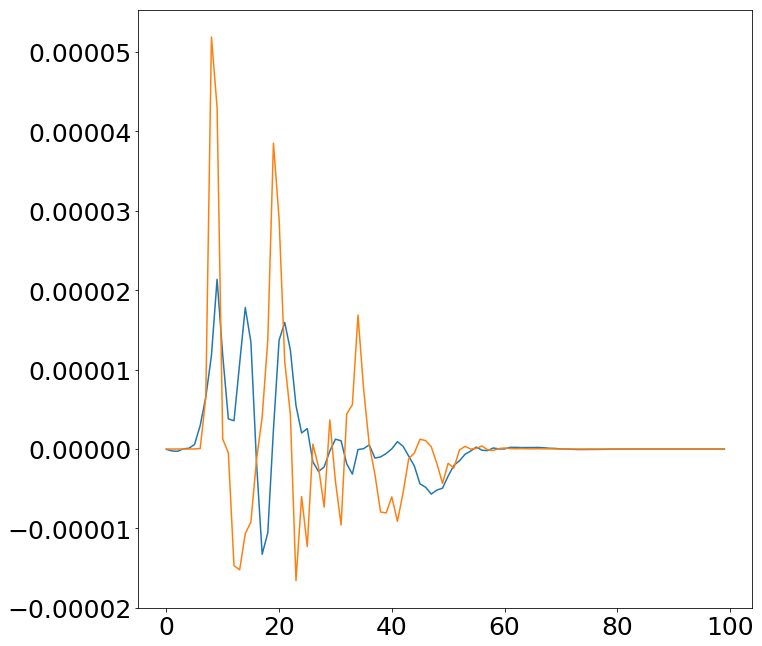

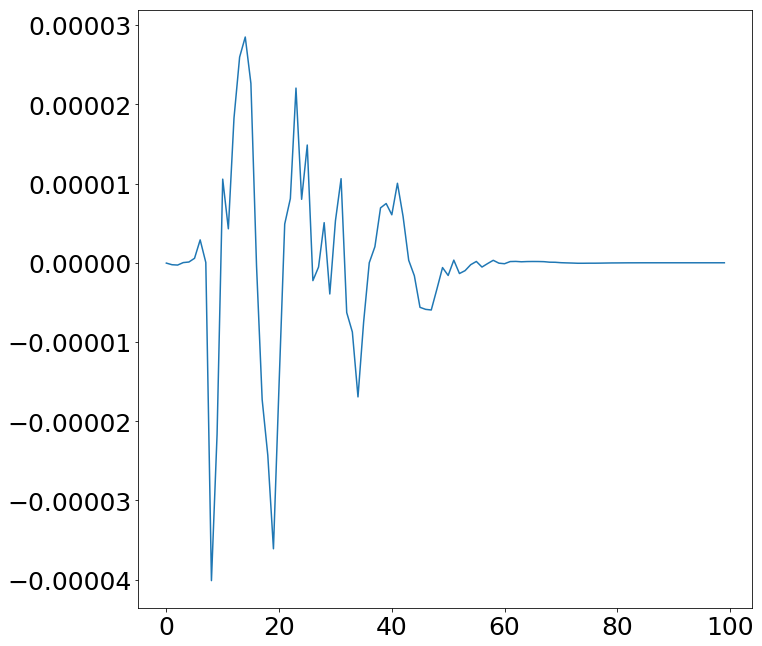

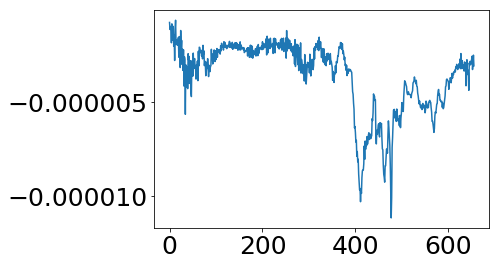

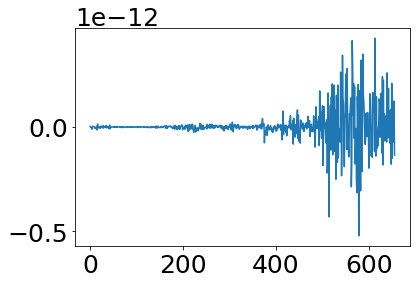

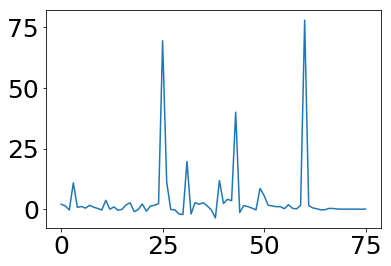

In [14]:
diflux = np.zeros((ndstep,mpsi-1))
deflux = np.zeros((ndstep,mpsi-1))

r = np.linspace(0,mpsi-1,mpsi)
#r = np.arange(mpsi-1)

for t in range(0,ndstep):
    diflux[t] = np.diff(r*data1di[t,:,0])/r[1:]
    deflux[t] = np.diff(r*data1de[t,:,0])/r[1:]
t=495
plt.figure(figsize=(11,11))
plt.plot(diflux[t])
plt.plot(deflux[t])
plt.show()

plt.figure(figsize=(11,11))
plt.plot(diflux[t] - deflux[t])
plt.show()

difluxAvg = np.zeros(ndstep)
defluxAvg = np.zeros(ndstep)
difluxMin = np.zeros(ndstep)
defluxMin = np.zeros(ndstep)

for t in range(0,ndstep):
    difluxAvg[t] = np.average(np.diff(data1di[t,:,0]))
    defluxAvg[t] = np.average(np.diff(data1de[t,:,0]))
    
    difluxMin[t] = np.min(np.diff(data1di[t,:,0]))    
    defluxMin[t] = np.min(np.diff(data1de[t,:,0]))


plt.plot(difluxAvg / difluxMin)
plt.show()
plt.plot(defluxAvg / defluxMin)
plt.show()

plt.plot(deflux[-1,9:85] / diflux[-1,9:85])
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


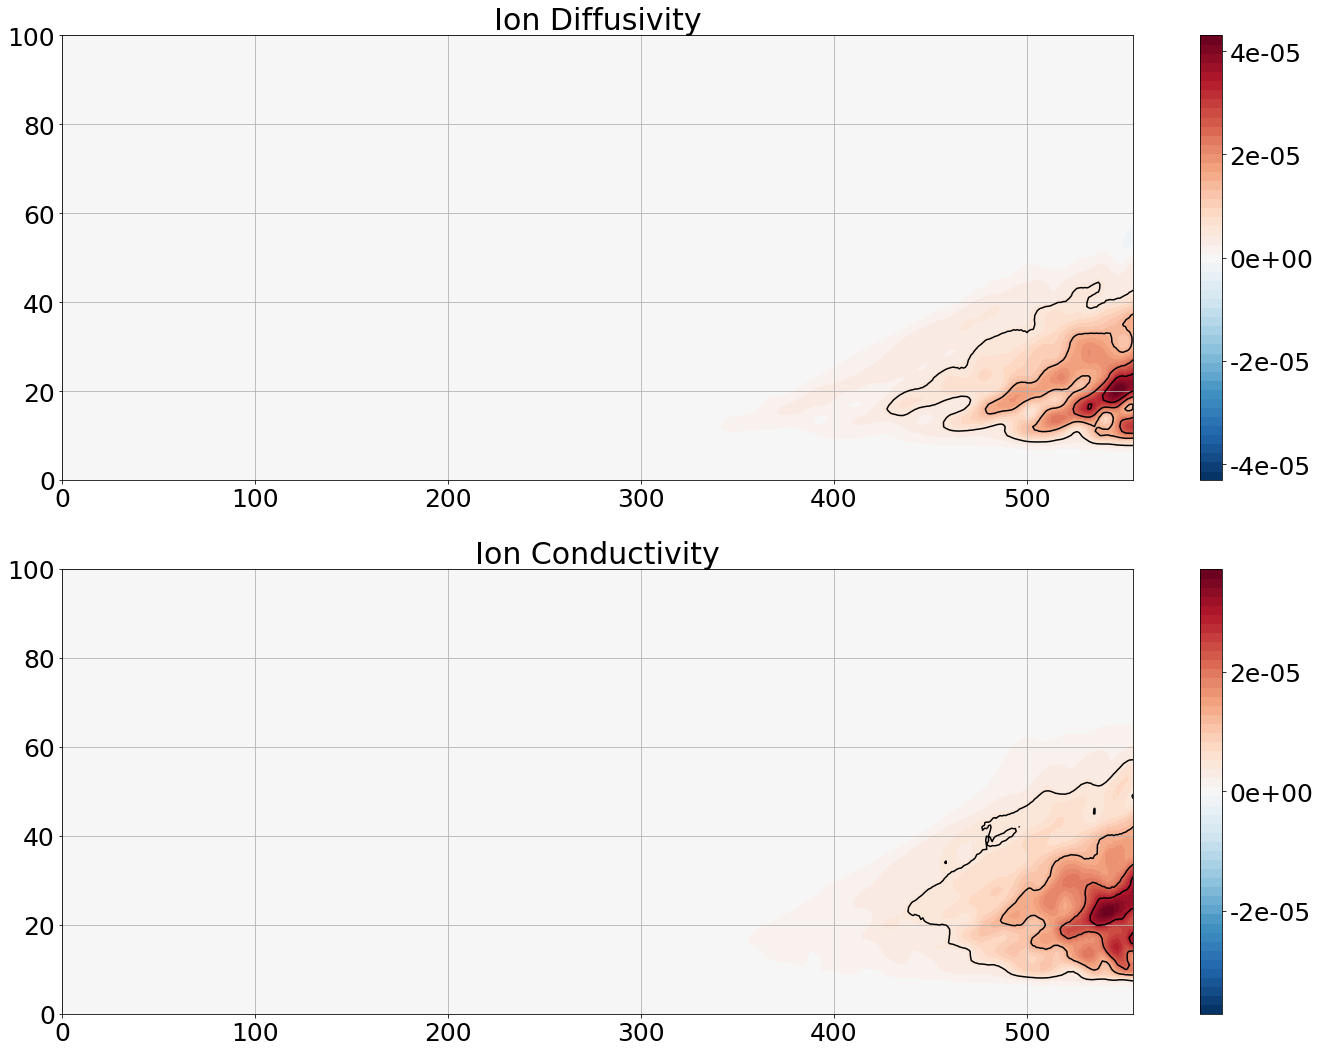

In [233]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

plt.figure(figsize=(24,18))
plt.subplot(2,1,1)
plt.title('Ion Diffusivity')
z=np.transpose(data1di[:,:,0])
zmax=abs(z).max()
zmin=-zmax
plt.contourf(z,np.linspace(zmin,zmax,50),cmap='RdBu_r')
lim=data1di[:,:,1].max()
#plt.clim(-lim,lim)
cb=plt.colorbar(format='%0.e')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()

plt.contour(z,np.linspace(zmin,zmax,10),colors='k')
plt.grid('on')
#plt.show()

plt.subplot(2,1,2)
plt.title('Ion Conductivity')
z=np.transpose(data1di[:,:,1])
zmax=abs(z).max()
zmin=-zmax
plt.contourf(z,np.linspace(zmin,zmax,50),cmap='RdBu_r')
lim=data1di[:,:,1].max()
#plt.clim(-lim,lim)
cb=plt.colorbar(format='%0.e')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
plt.contour(z,np.linspace(zmin,zmax,10),colors='k')
plt.grid('on')
plt.show()


In [295]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

data1d_tmp=data1de
speciesName='Electron'
iTimeOfInterest=[int(np.shape(data1d_tmp)[0]*0.6), int(np.shape(data1d_tmp)[0]*0.7)]

plt.figure(figsize=(24,18))
plt.subplot(2,2,1)
plt.title(speciesName+' Diffusivity')
z=np.transpose(data1d_tmp[:,:,0])
zmax=abs(z).max()
zmin=-zmax
plt.contourf(z,np.linspace(zmin,zmax,50),cmap='RdBu_r')
cb=plt.colorbar(format='%0.e')
plt.axvline(iTimeOfInterest[0],c='tomato',alpha=0.99,lw=2)
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
plt.contour(z,np.linspace(zmin,zmax,10),colors='k')
plt.grid('on')
#plt.show()

plt.subplot(2,2,2)
plt.title(speciesName+' Diffusivity')
z=np.transpose(data1d_tmp[iTimeOfInterest,:,0])
plt.plot(z,lw=3,c='tomato')
plt.grid('on')


plt.subplot(2,2,4)
plt.title(speciesName+' Conductivity')
z=np.transpose(data1d_tmp[iTimeOfInterest,:,1])
plt.plot(k*z,lw=3,c='tomato')
plt.grid('on')

plt.subplot(2,2,3)
plt.title(speciesName+' Conductivity')
z=np.transpose(data1d_tmp[:,:,1])
zmax=abs(z).max()
zmin=-zmax
plt.contourf(z,np.linspace(zmin,zmax,50),cmap='RdBu_r')
cb=plt.colorbar(format='%0.e')
plt.axvline(iTimeOfInterest,c='tomato',alpha=0.99,lw=2)
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
plt.contour(z,np.linspace(zmin,zmax,10),colors='k')
plt.grid('on')
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


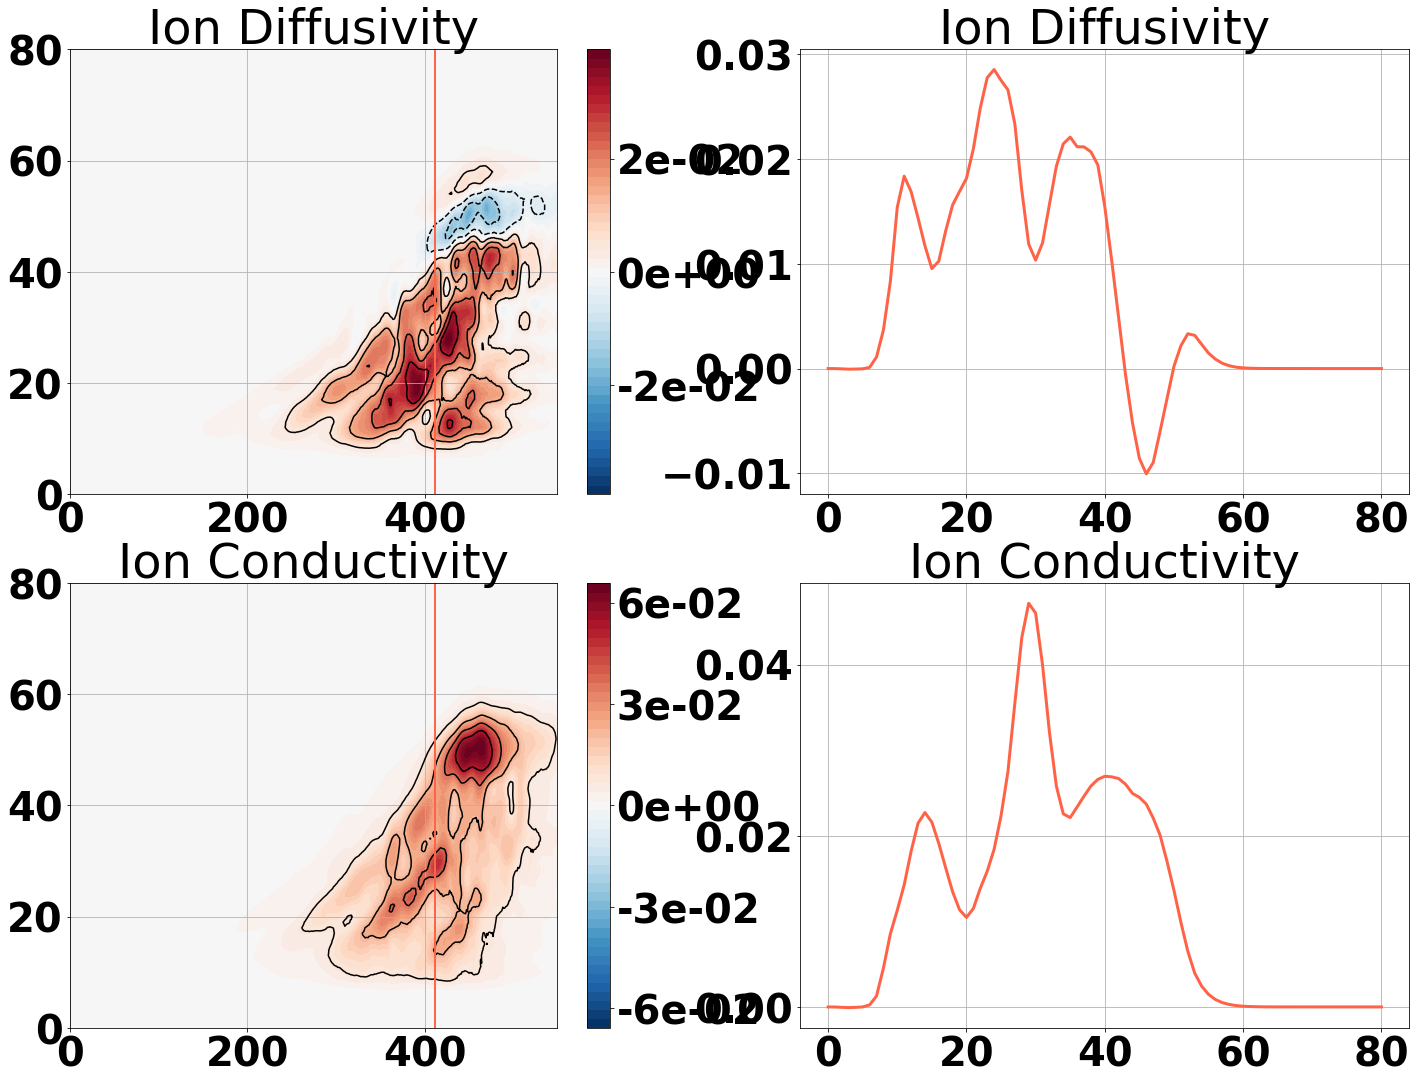

In [141]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

data1d_tmp=k*data1di
speciesName='Ion'
iTimeOfInterest=int(np.shape(data1d_tmp)[0]*0.75)

plt.figure(figsize=(24,18))
plt.subplot(2,2,1)
plt.title(speciesName+' Diffusivity')
z=np.transpose(data1d_tmp[:,:,0])
zmax=abs(z).max()
zmin=-zmax
plt.contourf(z,np.linspace(zmin,zmax,50),cmap='RdBu_r')
cb=plt.colorbar(format='%0.e')
plt.axvline(iTimeOfInterest,c='tomato',alpha=0.99,lw=2)
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
plt.contour(z,np.linspace(zmin,zmax,10),colors='k')
plt.grid('on')
#plt.show()

plt.subplot(2,2,2)
plt.title(speciesName+' Diffusivity')
z=np.transpose(data1d_tmp[iTimeOfInterest,:,0])
plt.plot(z,lw=3,c='tomato')
plt.grid('on')


plt.subplot(2,2,4)
plt.title(speciesName+' Conductivity')
z=np.transpose(data1d_tmp[iTimeOfInterest,:,1])
plt.plot(z,lw=3,c='tomato')
plt.grid('on')

plt.subplot(2,2,3)
plt.title(speciesName+' Conductivity')
z=np.transpose(data1d_tmp[:,:,1])
zmax=abs(z).max()
zmin=-zmax
plt.contourf(z,np.linspace(zmin,zmax,50),cmap='RdBu_r')
cb=plt.colorbar(format='%0.e')
plt.axvline(iTimeOfInterest,c='tomato',alpha=0.99,lw=2)
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
plt.contour(z,np.linspace(zmin,zmax,10),colors='k')
plt.grid('on')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

data1d_tmp=k*data1di
speciesName='Ion'
iTimeOfInterest0=int(np.shape(data1d_tmp)[0]*0.85)
iTimeOfInterest1=int(np.shape(data1d_tmp)[0]*0.95)

plt.figure(figsize=(24,18))
plt.subplot(2,2,1)
plt.title(speciesName+' Diffusivity')
z=np.transpose(data1d_tmp[:,:,0])
zmax=abs(z).max()
zmin=-zmax
plt.contourf(z,np.linspace(zmin,zmax,50),cmap='RdBu_r')
cb=plt.colorbar(format='%0.e')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
plt.axvspan(iTimeOfInterest0,iTimeOfInterest1,color='tomato',alpha=0.5)
plt.contour(z,np.linspace(zmin,zmax,10),colors='k')
plt.grid('on')
#plt.show()

plt.subplot(2,2,2)
plt.title(speciesName+' Diffusivity')
z=np.transpose(np.mean(data1d_tmp[iTimeOfInterest0:iTimeOfInterest1,:,0],axis=0))
plt.plot(z,lw=3,c='tomato')
plt.grid('on')

plt.subplot(2,2,4)
plt.title(speciesName+' Conductivity')
z=np.transpose(np.mean(data1d_tmp[iTimeOfInterest0:iTimeOfInterest1,:,1],axis=0))
plt.plot(z,lw=3,c='tomato')
plt.grid('on')

plt.subplot(2,2,3)
plt.title(speciesName+' Conductivity')
z=np.transpose(data1d_tmp[:,:,1])
zmax=abs(z).max()
zmin=-zmax
plt.contourf(z,np.linspace(zmin,zmax,50),cmap='RdBu_r')
cb=plt.colorbar(format='%0.e')
plt.axvspan(iTimeOfInterest0,iTimeOfInterest1,color='tomato',alpha=0.5)
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
plt.contour(z,np.linspace(zmin,zmax,10),colors='k')
plt.grid('on')
plt.show()


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


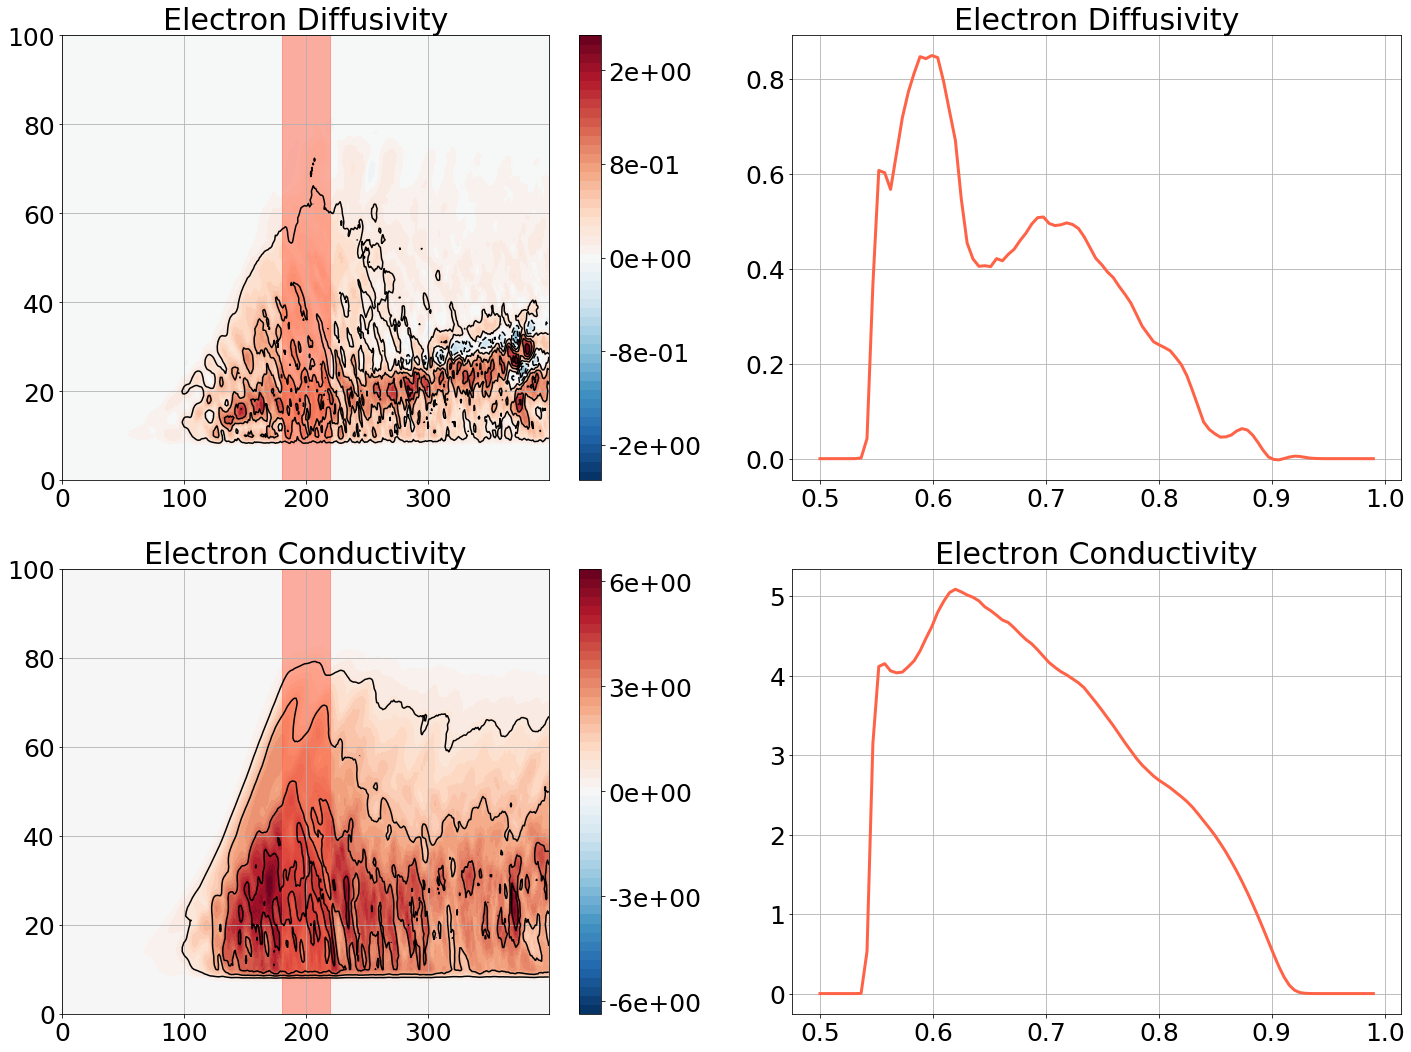

In [300]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

rho0=1.4654782E-03
utime=5.6826126E-09
ulength=1.754700
k=(ulength**2)*(rho0**2)/utime

data1d_tmp=k*data1de
speciesName='Electron'
iTimeOfInterest0=int(np.shape(data1d_tmp)[0]*0.45)
iTimeOfInterest1=int(np.shape(data1d_tmp)[0]*0.55)

plt.figure(figsize=(24,18))
plt.subplot(2,2,1)
plt.title(speciesName+' Diffusivity')
z=np.transpose(data1d_tmp[:,:,0])
zmax=abs(z).max()
zmin=-zmax
plt.contourf(z,np.linspace(zmin,zmax,50),cmap='RdBu_r')
cb=plt.colorbar(format='%0.e')
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
plt.axvspan(iTimeOfInterest0,iTimeOfInterest1,color='tomato',alpha=0.5)
plt.contour(z,np.linspace(zmin,zmax,10),colors='k')
plt.grid('on')
#plt.show()

plt.subplot(2,2,2)
plt.title(speciesName+' Diffusivity')
z=np.transpose(np.mean(data1d_tmp[iTimeOfInterest0:iTimeOfInterest1,:,0],axis=0))
plt.plot(psi,z,lw=3,c='tomato')
plt.grid('on')

plt.subplot(2,2,4)
plt.title(speciesName+' Conductivity')
z=np.transpose(np.mean(data1d_tmp[iTimeOfInterest0:iTimeOfInterest1,:,1],axis=0))
plt.plot(psi,z,lw=3,c='tomato')
plt.grid('on')

plt.subplot(2,2,3)
plt.title(speciesName+' Conductivity')
z=np.transpose(data1d_tmp[:,:,1])
zmax=abs(z).max()
zmin=-zmax
plt.contourf(z,np.linspace(zmin,zmax,50),cmap='RdBu_r')
cb=plt.colorbar(format='%0.e')
plt.axvspan(iTimeOfInterest0,iTimeOfInterest1,color='tomato',alpha=0.5)
tick_locator = ticker.MaxNLocator(nbins=5)
cb.locator = tick_locator
cb.update_ticks()
plt.contour(z,np.linspace(zmin,zmax,10),colors='k')
plt.grid('on')
plt.show()


In [13]:
import pandas as pd
dat = pd.read_fwf('psi.txt', header=None, names=['mpsi','r','psi','q','arb'])


In [14]:
tmp0 = np.zeros(1)
tmp0[0] = 0.68
tmp1 = np.zeros(1)
tmp1[0] = 0.98
tmp = np.asarray(dat['psi'])
psi = np.concatenate((tmp0, tmp))
psi = np.concatenate((psi,tmp1))

In [15]:
len(psi)

101